In [8]:
import numpy as np
from heatmap import * 
import emcee
import pylab as plt
from astropy.table import Table
from itertools import product
import time
import triangle
import os
from IPython.html.widgets import interact
%matplotlib inline

In [4]:
Ns = np.load('binned_first_5000_gv_drawn_2000_samples.npy')

In [13]:
def browse_images(Ns):
    n = len(Ns)
    def view_image(i):
        plt.imshow(Ns[i].reshape(15,15).T, origin='lower', cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Galaxy: %s' % i)
        plt.show()
    interact(view_image, i=(0,n-1))

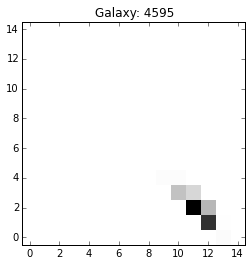

In [14]:
browse_images(Ns)

In [10]:
Ns.shape

(4596, 225)

In [15]:
data = Table.read('galaxy_data_extra.fits', format='fits')
green = data[np.where(np.logical_and(data['MU_MR'] < data['upper_GV'], data['MU_MR'] > data['lower_GV']))]
del data 

gsk =[1967, 2328, 2498, 4748, 6439, 8202, 11121, 11592, 12053, 13680, 14337, 16607, 17055, 18062, 18697, 18803, 18808, 20272, 20289, 20338, 20426, 20429, 20468, 20488, 21075, 21351]

green = np.delete(green, gsk)

greens = green[:5000]


In [19]:
empty = [1, 2, 6, 14, 17, 21, 22, 25, 26, 61, 64, 72, 81, 84, 103, 104, 111, 114, 116, 128, 143, 156, 219, 223, 226, 229, 246, 252, 279, 291, 333, 348, 358, 365, 378, 379, 382, 394, 403, 436, 441, 446, 448, 450, 460, 470, 481, 520, 572, 587, 590, 602, 606, 609, 629, 647, 657, 662, 668, 677, 684, 686, 705, 708, 724, 771, 793, 829, 832, 835, 836, 841, 854, 863, 879, 897, 908, 913, 945, 962, 971, 996, 1010, 1026, 1032, 1042, 1060, 1061, 1089, 1100, 1129, 1157, 1187, 1202, 1214, 1218, 1223, 1225, 1269, 1271, 1281, 1293, 1368, 1371, 1381, 1419, 1433, 1435, 1442, 1452, 1477, 1497, 1530, 1544, 1567, 1571, 1582, 1588, 1622, 1636, 1647, 1657, 1662, 1663, 1707, 1710, 1714, 1730, 1731, 1738, 1750, 1751, 1753, 1775, 1831, 1840, 1853, 1856, 1859, 1891, 1908, 1928, 1942, 1944, 1945, 1950, 1958, 1973, 1984, 1987, 1992, 1995, 2000, 2011, 2012, 2014, 2032, 2033, 2051, 2057, 2070, 2071, 2086, 2091, 2103, 2110, 2155, 2174, 2192, 2193, 2195, 2197, 2201, 2207, 2209, 2220, 2235, 2236, 2237, 2239, 2241, 2248, 2251, 2252, 2259, 2262, 2270, 2273, 2282, 2284, 2288, 2297, 2301, 2312, 2322, 2326, 2328, 2332, 2334, 2338, 2344, 2346, 2347, 2350, 2371, 2391, 2393, 2408, 2409, 2426, 2430, 2436, 2450, 2465, 2475, 2517, 2522, 2542, 2548, 2551, 2555, 2558, 2559, 2560, 2566, 2569, 2582, 2584, 2588, 2594, 2596, 2605, 2608, 2611, 2614, 2632, 2650, 2654, 2665, 2691, 2719, 2721, 2730, 2736, 2759, 2769, 2781, 2800, 2802, 2806, 2812, 2889, 2896, 2913, 2934, 2937, 2946, 2954, 2976, 2999, 3000, 3003, 3011, 3013, 3019, 3043, 3058, 3063, 3086, 3107, 3112, 3113, 3133, 3143, 3146, 3161, 3173, 3181, 3184, 3185, 3191, 3208, 3224, 3228, 3232, 3248, 3283, 3291, 3292, 3304, 3307, 3328, 3358, 3387, 3432, 3452, 3468, 3470, 3475, 3476, 3531, 3537, 3546, 3558, 3573, 3585, 3588, 3591, 3610, 3612, 3619, 3621, 3656, 3710, 3717, 3719, 3723, 3739, 3827, 3832, 3890, 3899, 3909, 3942, 3972, 3992, 3995, 3999, 4012, 4026, 4044, 4045, 4100, 4104, 4111, 4154, 4176, 4181, 4208, 4226, 4237, 4253, 4260, 4275, 4288, 4289, 4293, 4298, 4359, 4360, 4361, 4362, 4368, 4372, 4373, 4375, 4377, 4379, 4383, 4387, 4389, 4391, 4394, 4395, 4398, 4402, 4407, 4414, 4415, 4472, 4477, 4493, 4494, 4501, 4524, 4531, 4607, 4615, 4629, 4642, 4645, 4646, 4648, 4683, 4708, 4752, 4753, 4760, 4796, 4819, 4833, 4834, 4837, 4845, 4865, 4877, 4883, 4887, 4900, 4942, 4947, 4965, 4966, 4967]
greens = np.delete(greens, empty, axis=0)

In [42]:
pd = greens['t01_smooth_or_features_a02_features_or_disk_debiased']
ps = greens['t01_smooth_or_features_a01_smooth_debiased']
ps = 1 - pd

In [52]:
Ns[np.where(Ns < 1E-5)] = 0

In [80]:
sumd = np.zeros((15, 15))
sums = np.zeros((15, 15))
for i in range(20):
    sumd += Ns[i].reshape(15,15)*pd[i]
    sums += Ns[i].reshape(15,15)*ps[i]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


<matplotlib.colorbar.Colorbar instance at 0x22d17d1b8>

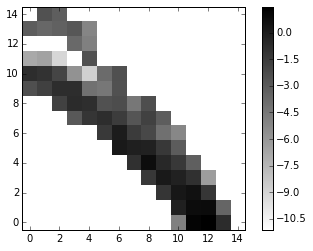

In [81]:
plt.imshow(np.log(sums.T), origin='lower', cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x22d78d7e8>

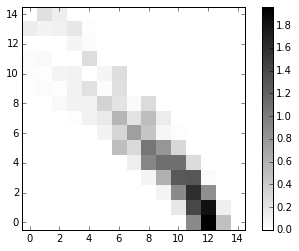

In [89]:
plt.imshow(np.log((sumd+1).T), origin='lower', cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()

In [85]:
np.min(sumd)

0.0

In [68]:
np.save('sum_weight_10x10_first_5000_green_disc.npy', sumd)
np.save('sum_weight_10x10_first_5000_green_smooth.npy', sums)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log


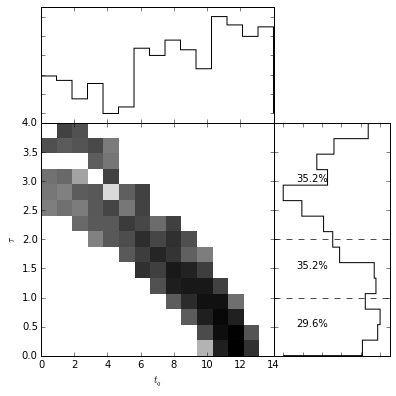

In [103]:
ndim = 15**2 - 1
agnha = (np.log10(sumd))
agnha[agnha < -100] = 0
sumdha =  (agnha - np.min(agnha)) / (np.max(agnha)-np.min(agnha))

xs = np.sum(sumdha, axis=1)
xsd = (xs-np.min(xs))/(np.max(xs)-np.min(xs))
ys = np.sum(sumdha, axis=0)
ysd = (ys-np.min(ys))/(np.max(ys)-np.min(ys))

ysl = 100 * np.sum(ysd[Ys[:-1]+np.diff(Ys)[0] <= 1.0])/np.sum(ysd)
ysm = 100 * np.sum(ysd[np.where(np.logical_and(Ys[:-1]+np.diff(Ys)[0] < 2.0, Ys[:-1]+np.diff(Ys)[0] > 1.0))])/np.sum(ysd)
ysh = 100 * np.sum(ysd[Ys[:-1]+np.diff(Ys)[0] >= 2.0])/np.sum(ysd)

fig = plt.figure(figsize=(6.25,6.25))
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
ax2.set_xlabel(r'$t_q$')
ax2.set_ylabel(r'$\tau$')
ax2.imshow(np.log(sumd.T), origin='lower', cmap=plt.cm.binary, interpolation='nearest', extent=(0,14,0,4), aspect='auto')
ax2.tick_params(axis='x', labeltop='off')
ax1 = plt.subplot2grid((3,3), (0,0),colspan=2)
ax1.hist(Xs[:-1], weights=xsd, bins=Xs, histtype='step', color='k')
ax1.set_xlim(0, 14)
ax1.set_ylim(-0.1, 1.1)
ax1.tick_params(axis='x', labelbottom='off', labeltop='off')
ax1.tick_params(axis='y', labelleft='off')
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax3.tick_params(axis='x', labelbottom='off')
ax3.tick_params(axis='y', labelleft='off')
ax3.hist(Ys[:-1], weights=ysd, bins=Ys, histtype='step', color='k', orientation='horizontal')
ax3.set_xlim(-0.1, 1.1)
ax3.text(0.2, 0.125, str("%.1f"%ysl)+'%', color='k', transform=ax3.transAxes)
ax3.text(0.2, 0.375, str("%.1f"%ysm)+'%', color='k', transform=ax3.transAxes)
ax3.text(0.2, 0.75, str("%.1f"%ysh)+'%', color='k', transform=ax3.transAxes)
ax3.axhline(y = 1.0, xmin=0, xmax=1, color='0.3', linestyle='dashed')
ax3.axhline(y = 2.0, xmin=0, xmax=1, color='0.3', linestyle='dashed')
#fig.tight_layout()
plt.subplots_adjust(wspace=0.0)
plt.subplots_adjust(hspace=0.0)
plt.savefig('sum_weight_first_5000_green_disc.png')


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log


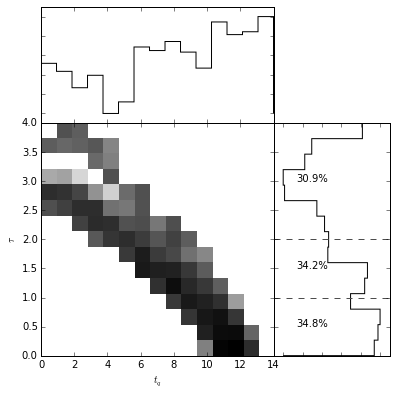

In [104]:
ndim = 15**2 - 1
agnha = (np.log10(sums))
agnha[agnha < -100] = 0
sumdha =  (agnha - np.min(agnha)) / (np.max(agnha)-np.min(agnha))

xs = np.sum(sumdha, axis=1)
xsd = (xs-np.min(xs))/(np.max(xs)-np.min(xs))
ys = np.sum(sumdha, axis=0)
ysd = (ys-np.min(ys))/(np.max(ys)-np.min(ys))


ysl = 100 * np.sum(ysd[Ys[:-1]+np.diff(Ys)[0] <= 1.0])/np.sum(ysd)
ysm = 100 * np.sum(ysd[np.where(np.logical_and(Ys[:-1]+np.diff(Ys)[0] < 2.0, Ys[:-1]+np.diff(Ys)[0] > 1.0))])/np.sum(ysd)
ysh = 100 * np.sum(ysd[Ys[:-1]+np.diff(Ys)[0] >= 2.0])/np.sum(ysd)

fig = plt.figure(figsize=(6.25,6.25))
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
ax2.set_xlabel(r'$t_q$')
ax2.set_ylabel(r'$\tau$')
ax2.imshow(np.log(sums.T), origin='lower', cmap=plt.cm.binary, interpolation='nearest', extent=(0,14,0,4), aspect='auto')
ax2.tick_params(axis='x', labeltop='off')
ax1 = plt.subplot2grid((3,3), (0,0),colspan=2)
ax1.hist(Xs[:-1], weights=xsd, bins=Xs, histtype='step', color='k')
ax1.set_xlim(0, 14)
ax1.set_ylim(-0.1, 1.1)
ax1.tick_params(axis='x', labelbottom='off', labeltop='off')
ax1.tick_params(axis='y', labelleft='off')
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax3.tick_params(axis='x', labelbottom='off')
ax3.tick_params(axis='y', labelleft='off')
ax3.hist(Ys[:-1], weights=ysd, bins=Ys, histtype='step', color='k', orientation='horizontal')
ax3.set_xlim(-0.1, 1.1)
ax3.text(0.2, 0.125, str("%.1f"%ysl)+'%', color='k', transform=ax3.transAxes)
ax3.text(0.2, 0.375, str("%.1f"%ysm)+'%', color='k', transform=ax3.transAxes)
ax3.text(0.2, 0.75, str("%.1f"%ysh)+'%', color='k', transform=ax3.transAxes)
ax3.axhline(y = 1.0, xmin=0, xmax=1, color='0.3', linestyle='dashed')
ax3.axhline(y = 2.0, xmin=0, xmax=1, color='0.3', linestyle='dashed')
#fig.tight_layout()
plt.subplots_adjust(wspace=0.0)
plt.subplots_adjust(hspace=0.0)
plt.savefig('sum_weight_first_5000_green_smooth.png')
